In [68]:
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
INPUT_LAYER = 784
HIDDEN_LAYER_1 = 128
HIDDEN_LAYER_2 = 64
OUTPUT_LAYER = 10
LEARNING_RATE = 0.45
epoch = 7
lamda = 0.1

In [69]:
def Randomise():
    e = 0.12
    Theta_1 = np.random.rand(HIDDEN_LAYER_1,INPUT_LAYER+1)*(2*e) - (e)    #128x785
    Theta_2 = np.random.rand(HIDDEN_LAYER_2,HIDDEN_LAYER_1+1)*(2*e) - (e)   #64x129
    Theta_3 = np.random.rand(OUTPUT_LAYER,HIDDEN_LAYER_2+1)*(2*e) - (e)     #10x65
    return Theta_1,Theta_2,Theta_3

In [70]:
def hotVector(Y):
    Yk = []
    for i in range(len(Y)):
        a = Y[i][0]
        t = np.zeros((10,1))
        t[a] = 1
        Yk.append(t)
    return Yk

In [71]:
def sigmoid(z):
    return (1.0/(1.0 + np.exp(-1.0 * z)))

In [72]:
def sigmoidGradient(z):
    p = sigmoid(z)
    q = np.ones(np.shape(z)) - p
    t = []
    for i in range(len(p)):
        t.append(p[i]*q[i])
    t = np.reshape(t,(len(z),1))
    return t

In [73]:
def Forward(a1,Theta_1,Theta_2,Theta_3):
    a1 = np.insert(a1,0,1)
    a1 = np.reshape(a1,(785,1))
    #######################################
    z2 = np.matmul(Theta_1,a1)   #128x1
    a2 = sigmoid(z2)
    a2 = np.insert(a2,0,1)       #129x1
    a2 = np.reshape(a2,(129,1))
    #######################################
    z3 = np.matmul(Theta_2,a2)   #64x1
    a3 = sigmoid(z3)
    a3 = np.insert(a3,0,1)       #65x1
    a3 = np.reshape(a3,(65,1))
    #######################################
    z4 = np.matmul(Theta_3,a3)  #10x1
    a4 = sigmoid(z4)            #10x1
    a4 = np.reshape(a4,(10,1))
    #######################################
    return a1,z2,a2,z3,a3,z4,a4

In [74]:
def calc_delta_3(Theta_3,delta_4,z3):
    #print(np.shape(Theta_3),np.shape(delta_4))
    t = np.matmul(np.transpose(Theta_3),delta_4)    #65x1
    z3 = np.insert(z3,0,1)
    f = sigmoidGradient(z3)
    delta_3 = []
    #print(np.shape(t))
    for i in range(65):
        a = f[i] * z3[i]
        delta_3.append(a)
    delta_3 = np.reshape(delta_3,(65,1))
    delta_3 = np.delete(delta_3,0,axis = 0)    #64x1
    return delta_3
        

In [75]:
def calc_delta_2(Theta_2,delta_3,z2):
    t = np.matmul(np.transpose(Theta_2),delta_3)     #129x1
    z2 = np.insert(z2,0,1)
    f = sigmoidGradient(z2)
    delta_2 = []
    for i in range(129):
        a = f[i] * z2[i]
        delta_2.append(a)
    delta_2 = np.reshape(delta_2,(129,1))
    delta_2 = np.delete(delta_2,0,axis = 0)   #128x1
    return delta_2

In [76]:
def cost_NN(Yk,H,Theta_1,Theta_2,Theta_3):
    J = 0.0
    for i in range(100):
        J += np.matmul(np.transpose(Yk[i]),np.log(H[i])) + np.matmul(np.transpose(np.ones((10,1))-Yk[i]),np.log(np.ones((10,1)) - H[i]))
        J = (-1.0/100)*J 
    return J[0][0] 

In [77]:
def Train_NN(X,Y,Theta_1,Theta_2,Theta_3):
    Theta1_grad = np.zeros(np.shape(Theta_1))
    Theta2_grad = np.zeros(np.shape(Theta_2))
    Theta3_grad = np.zeros(np.shape(Theta_3))
    Yk = hotVector(Y)
    x1,cost1 = [],[]
    for i in range(epoch):
        H = []
        for j in range(len(X)):
            a1,z2,a2,z3,a3,z4,a4 = Forward(X[j],Theta_1,Theta_2,Theta_3)  #Forward
            H.append(a4)
            delta_4 = a4 - Yk[j]
            delta_3 = calc_delta_3(Theta_3,delta_4,z3)
            delta_2 = calc_delta_2(Theta_2,delta_3,z2)
            #################################################################
            Theta3_grad = Theta3_grad - np.divide(np.matmul(delta_4,np.transpose(a3)),len(X))
            Theta2_grad = Theta2_grad - np.divide(np.matmul(delta_3,np.transpose(a2)),len(X))
            Theta1_grad = Theta1_grad - np.divide(np.matmul(delta_2,np.transpose(a1)),len(X))
            #################################################################
        Theta_1 = Theta_1 + (LEARNING_RATE*(Theta1_grad))
        Theta_2 = Theta_2 + (LEARNING_RATE*(Theta2_grad))
        Theta_3 = Theta_3 + (LEARNING_RATE*(Theta3_grad))
        cost = cost_NN(Yk,H,Theta_1,Theta_2,Theta_3)
        
        x1.append(i)
        cost1.append(cost)
        plt.plot(x1,cost1,'-')
        plt.xlabel('No of iterations')
        plt.ylabel('cost')
    plt.show()
    return Theta_1,Theta_2,Theta_3
            

/home/prerit/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


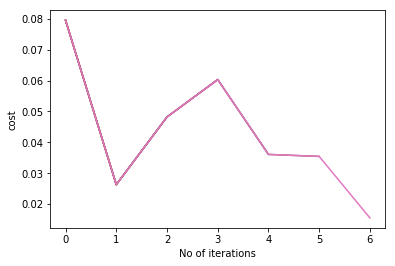

Completed
0.14


In [78]:
X = pd.read_csv('./mnist_train_100.csv',header = None,usecols = range(1,785)).values
Y = pd.read_csv('./mnist_train_100.csv',header = None,usecols = [0]).values
Theta_1,Theta_2,Theta_3 = Randomise() 
Theta_1,Theta_2,Theta_3 = Train_NN(X,Y,Theta_1,Theta_2,Theta_3)
print("Completed")
count = 0.0
for i in range(len(X)):
    a1,z2,a2,z3,a3,z4,a4 = Forward(X[i],Theta_1,Theta_2,Theta_3) 
    t = np.max(a4)
    for j in range(10):
        if(t == a4[j]):
            if(j == Y[i]):
                count += 1
            else:
                count += 0
print(count)

